# KC Housing Data Evaluation

In [492]:
#Import the relevant packages into notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Upload the data into the notebook and examine it

In [493]:
kc_house_data=pd.read_csv('data/kc_house_data.csv')

In [494]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [495]:
# Get info on the data
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [496]:
# Check for Null Values
kc_house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There appears to be three columns that have missing data. waterfront, yr_renovated and view. View is only missing 63 while the other two are missing north of 2000. We will probably look deeper but to not mess with the data too much it may make sense to drop those 63 missing view columns.

Get a first look at some of the correlations between the different factors. Specifcally examine how they relate to price.

<AxesSubplot:>

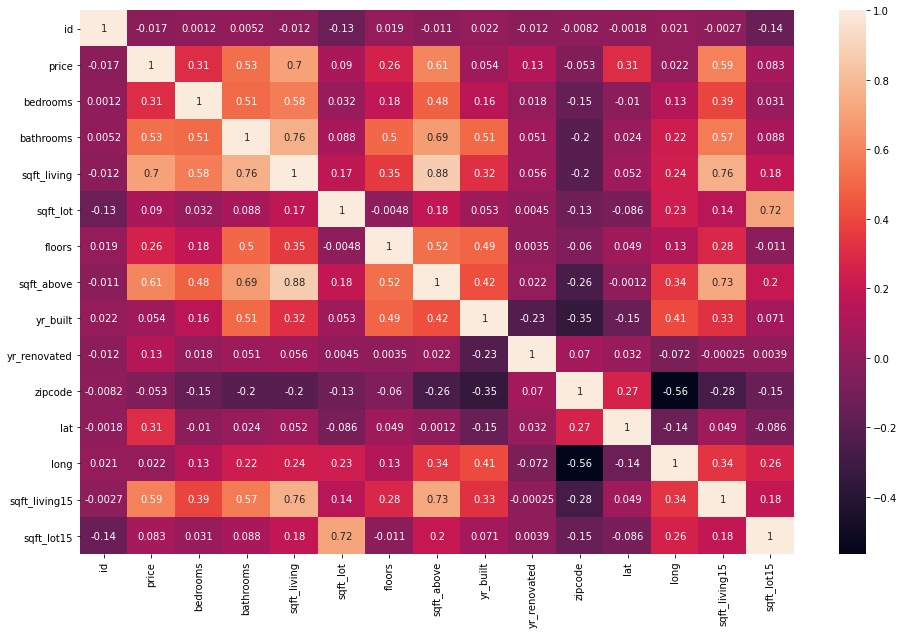

In [497]:
# Seaborn heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(data=kc_house_data.corr(), annot=True)

Examine the missing data in Waterfront and decide what to do with it

In [498]:
kc_house_data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [499]:
# Converting all NANs in waterfront to NO because that is overwhelmingly the most common value.
kc_house_data['waterfront']=kc_house_data['waterfront'].fillna('NO')

In [500]:
kc_house_data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [501]:
kc_house_data['waterfront'].isna().sum()

0

We decided that it was best to turn the NaN of the waterfront data into NO. This is because the ratio was 19075 NO to 146 YES. Now lets do the same to View and yr_renovated columns based on what they are missing

In [502]:
kc_house_data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [503]:
# Converting all NANs in view to NONE because that is overwhelmingly the most common value.
kc_house_data['view']=kc_house_data['view'].fillna('NONE')
kc_house_data['view'].isna().sum()

0

In [504]:
kc_house_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [505]:
# Converting all NANs in yr_renovated to 0 because that is overwhelmingly the most common value.
kc_house_data['yr_renovated'].fillna(0.0, inplace=True)
kc_house_data['yr_renovated'].isna().sum()

0

Now I will deal with the data types that are not in numeric form. We must change them into some type of numeric form before we can deal with them

In [506]:
# There are six columns that are in object form
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Waterfront

In [507]:
kc_house_data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [508]:
X1=kc_house_data['waterfront']

In [509]:
#Label encode NO and YES into 0 and 1 for the Waterfront column
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
origin_encoded = lb_make.fit_transform(X1)
origin_encoded
origin_encoded=pd.Series(origin_encoded)
origin_encoded.value_counts()

0    21451
1      146
dtype: int64

In [510]:
#Replace the old categorial series with our numeric one
kc_house_data['waterfront']=origin_encoded

In [511]:
#Check to make sure this worked properly
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [512]:
X= kc_house_data.drop(['price'],axis=1)
y=kc_house_data['price']

In [513]:
# I am thinking working through the data in this manner may be better. If using it this early in notebook does not 
# work I will move it down to after I finish cleaning the entire data set
#I've commented it out as it seems best to do this later
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [514]:
#X_train.info()

In [515]:
kc_house_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

### View

In [516]:
from sklearn.preprocessing import OneHotEncoder
view = OneHotEncoder(sparse=False, handle_unknown='ignore')
X2 = kc_house_data[['view']]
view.fit(X2)
view.transform(X2)
view_array = view.transform(X2)
view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'),
                          index=kc_house_data.index)
kc_house_data = pd.concat([kc_house_data, view_panda], axis=1)
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,View_Average,View_Excellent,View_Fair,View_Good,View_None
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,1.0


In [517]:
kc_house_data.drop('view', axis=1, inplace=True)
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,View_Average,View_Excellent,View_Fair,View_Good,View_None
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,Average,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,Average,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,Average,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,Very Good,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,Average,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,1.0


### Condition

In [518]:
condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
X3 = kc_house_data[['condition']]
condition.fit(X3)
condition.transform(X3)
condition_array = condition.transform(X3)
condition_panda = pd.DataFrame(condition_array, columns= ('AvgCond','FairCond','GoodCond','PoorCond','VeryGoodCond'), 
                               index=kc_house_data.index)
kc_house_data = pd.concat([kc_house_data, condition_panda], axis=1)
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,View_Average,View_Excellent,View_Fair,View_Good,View_None,AvgCond,FairCond,GoodCond,PoorCond,VeryGoodCond
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,Very Good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [519]:
kc_house_data.drop('condition', axis=1, inplace=True)
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,View_Average,View_Excellent,View_Fair,View_Good,View_None,AvgCond,FairCond,GoodCond,PoorCond,VeryGoodCond
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,7 Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,6 Low Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,8 Good,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Sqft Basement 

In [520]:
kc_house_data["sqft_basement"].replace({"?": '0.0'}, inplace=True)
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].astype(float)

In [521]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  int64  
 9   grade           21597 non-null  object 
 10  sqft_above      21597 non-null  int64  
 11  sqft_basement   21597 non-null  float64
 12  yr_built        21597 non-null  int64  
 13  yr_renovated    21597 non-null  float64
 14  zipcode         21597 non-null  int64  
 15  lat             21597 non-null  float64
 16  long            21597 non-null  float64
 17  sqft_living15   21597 non-null 

In [522]:
kc_house_data['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

### Grade

In [523]:
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [524]:
grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
X4 = kc_house_data[['grade']]
grade.fit(X4)
grade.transform(X4)
grade_array = grade.transform(X4)
grade_panda = pd.DataFrame(grade_array, columns= ('VeryGoodGrade','ExcellentGrade','LuxaryGrade','MansionGrade','PoorGrade',
                                                 'LowGrade','FairGrade','LowAvgGrade','AvgGrade',
                                                  'GoodGrade','BetterGrade'),index=kc_house_data.index)
kc_house_data = pd.concat([kc_house_data, grade_panda], axis=1)
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,ExcellentGrade,LuxaryGrade,MansionGrade,PoorGrade,LowGrade,FairGrade,LowAvgGrade,AvgGrade,GoodGrade,BetterGrade
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,6 Low Average,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [525]:
kc_house_data.drop(columns=('grade'), inplace=True)

### Date

In [526]:
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])
kc_house_data['day_sold'] = kc_house_data['date'].map(lambda x: x.day)
kc_house_data['month_sold'] = kc_house_data['date'].map(lambda x: x.month)
kc_house_data['year_sold'] = kc_house_data['date'].map(lambda x: x.year)
kc_house_data.drop('date', axis=1, inplace=True)

In [527]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  View_Average    21597 non-null 

## Working with newly cleaned data

In [528]:
# This seems like the better time to do this now that there are no objects left in the data set
from sklearn.model_selection import train_test_split
X_new= kc_house_data.drop(['price'],axis=1)
y_new=kc_house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=100)

In [529]:
# Create Dummy Regressor
from sklearn.dummy import DummyRegressor
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train,y_train)
baseline.score(X_test,y_test)

-0.0002252015545449737

In [530]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_train,y_train)

0.7315060627312486

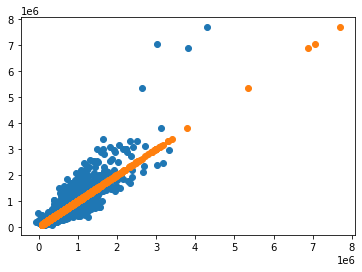

In [531]:
# First look at test prediction
y_test_pred=linreg.predict(X_test)
plt.scatter(y_test_pred,y_test)
plt.scatter(y_test,y_test);

This seems to do a poor job at predicting, especially towards the higher priced ones

In [532]:
#Get a score
linreg.score(X_test,y_test)

0.7312203494033793

In [533]:
#Try and use RFE to find best values... for now we will look at 3 but choosing that number will need to be evaluated
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X_train, y_train)
selector.support_ 

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False])

In [534]:
# Get a model score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=3)

array([0.73365398, 0.71819072, 0.71992986])

In [535]:
# Look at the correlations
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,PoorGrade,LowGrade,FairGrade,LowAvgGrade,AvgGrade,GoodGrade,BetterGrade,day_sold,month_sold,year_sold
id,1.000000,0.001392,0.003171,-0.010697,-0.130972,0.026625,-0.006095,-0.008229,-0.007013,0.025029,...,-0.005950,-0.001169,-0.028132,-0.013132,-0.018813,0.044579,0.007386,-0.002257,-0.008802,0.008262
bedrooms,0.001392,1.000000,0.509966,0.571611,0.041768,0.174694,-0.009579,0.471756,0.295603,0.152554,...,-0.020080,-0.070759,-0.106809,-0.232743,-0.106995,0.067507,0.161419,-0.012232,0.003773,-0.013338
bathrooms,0.003171,0.509966,1.000000,0.754862,0.092054,0.501498,0.056757,0.685377,0.278308,0.509144,...,-0.013970,-0.057950,-0.139281,-0.361788,-0.318158,0.189152,0.265665,-0.008065,0.007403,-0.024851
sqft_living,-0.010697,0.571611,0.754862,1.000000,0.175679,0.349225,0.097980,0.874879,0.430163,0.320791,...,-0.013416,-0.057001,-0.124387,-0.310274,-0.362749,0.068887,0.319427,-0.011902,0.010998,-0.028839
sqft_lot,-0.130972,0.041768,0.092054,0.175679,1.000000,-0.011335,0.023104,0.184937,0.018280,0.049333,...,-0.000420,0.000451,0.022915,-0.016425,-0.067733,-0.022685,0.043823,-0.001736,-0.001677,0.005769
floors,0.026625,0.174694,0.501498,0.349225,-0.011335,1.000000,0.016779,0.520579,-0.243201,0.495012,...,-0.007202,-0.030699,-0.079204,-0.230616,-0.311691,0.206585,0.242334,-0.007617,0.013139,-0.022651
waterfront,-0.006095,-0.009579,0.056757,0.097980,0.023104,0.016779,1.000000,0.064675,0.081447,-0.021540,...,-0.000650,-0.003050,0.020444,-0.005735,-0.046596,-0.011817,0.005842,0.011719,0.011761,-0.009991
sqft_above,-0.008229,0.471756,0.685377,0.874879,0.184937,0.520579,0.064675,1.000000,-0.053381,0.428343,...,-0.012102,-0.050587,-0.105895,-0.280190,-0.390688,0.060609,0.341678,-0.005664,0.011408,-0.026744
sqft_basement,-0.007013,0.295603,0.278308,0.430163,0.018280,-0.243201,0.081447,-0.053381,1.000000,-0.131537,...,-0.005095,-0.023153,-0.058623,-0.117263,-0.021503,0.030224,0.021234,-0.014113,0.002513,-0.009495
yr_built,0.025029,0.152554,0.509144,0.320791,0.049333,0.495012,-0.021540,0.428343,-0.131537,1.000000,...,-0.013696,-0.044276,-0.130624,-0.308188,-0.219266,0.201124,0.219234,-0.003529,-0.011228,0.005441


In [536]:
# Try and see which are above 75
abs(X_train.corr()) > 0.75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,PoorGrade,LowGrade,FairGrade,LowAvgGrade,AvgGrade,GoodGrade,BetterGrade,day_sold,month_sold,year_sold
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Code below taken from canvas has useful info in finding multicollinarty issues

In [537]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

In [538]:
# Look at possible issues of multi-collinarity 
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.874879
"(GoodCond, AvgCond)",0.809030
"(year_sold, month_sold)",0.779868
"(sqft_living15, sqft_living)",0.757674
"(sqft_living, bathrooms)",0.754862


In [539]:
#Drop certain columns from the data to avoid problems
X_train2=X_train.drop(columns=['GoodCond','month_sold','sqft_above','sqft_living15','bathrooms'])
X_test2=X_test.drop(columns=['GoodCond','month_sold','sqft_above','sqft_living15','bathrooms'])

In [540]:
X_train2.head()

,id,bedrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,zipcode,...,MansionGrade,PoorGrade,LowGrade,FairGrade,LowAvgGrade,AvgGrade,GoodGrade,BetterGrade,day_sold,year_sold
7152,7201600190,4,1570,7650,1.0,0,470.0,1975,0.0,98052,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20,2015
8823,2558600100,4,2100,12620,1.0,0,0.0,1972,0.0,98034,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27,2014
11039,8849300320,3,1330,12618,1.0,0,0.0,1983,0.0,98188,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16,2015
17557,3751606514,2,1780,81021,1.0,0,0.0,1954,0.0,98001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2014
16607,2607720440,3,1980,9725,2.0,0,0.0,1994,0.0,98045,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,2015


In [541]:
# Get info on new X_train2
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 7152 to 5640
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              16197 non-null  int64  
 1   bedrooms        16197 non-null  int64  
 2   sqft_living     16197 non-null  int64  
 3   sqft_lot        16197 non-null  int64  
 4   floors          16197 non-null  float64
 5   waterfront      16197 non-null  int64  
 6   sqft_basement   16197 non-null  float64
 7   yr_built        16197 non-null  int64  
 8   yr_renovated    16197 non-null  float64
 9   zipcode         16197 non-null  int64  
 10  lat             16197 non-null  float64
 11  long            16197 non-null  float64
 12  sqft_lot15      16197 non-null  int64  
 13  View_Average    16197 non-null  float64
 14  View_Excellent  16197 non-null  float64
 15  View_Fair       16197 non-null  float64
 16  View_Good       16197 non-null  float64
 17  View_None       16197 non-nul

In [542]:
# Now re-examine what we need to take... again will need to revisit the features select number
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=13)
selector = selector.fit(X_train2, y_train)
selector.ranking_ 

array([23,  8, 18, 22, 13,  1, 20, 14, 19, 16,  1, 15, 21,  3,  5, 11, 10,
        1,  6,  7,  4,  2,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 17,
       12])

In [543]:
# Select features as told above
x_cols=['waterfront','lat','ExcellentGrade','LuxaryGrade','MansionGrade','PoorGrade','LowGrade','FairGrade',
       'LowAvgGrade','AvgGrade','GoodGrade','BetterGrade']
outcome='price'
predictors='+'.join(x_cols)

In [544]:
# Model the data
from statsmodels.formula.api import ols
formula= outcome + '~' + predictors
new_model = ols(formula=formula, data=kc_house_data).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2869.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:00:29   Log-Likelihood:            -2.9709e+05
No. Observations:               21597   AIC:                         5.942e+05
Df Residuals:                   21584   BIC:                         5.943e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.959e+07   5.37e+05    -55.100      0.000   -3.06e+07   -2.85e+07
waterfront      8.858e+05   1.91e+04     46.388      0.000    8.48e+05    9.23e+05
lat             6.439e+05   1.13e+04     57.062      0.000    6.22e+05    6.66e+05
ExcellentGrade  3.993e+05   1.33e+04     30.059      0.000    3.73e+05    4.25e+05
LuxaryGrade     1.049e+06   2.52e+04     41.676      0.000       1e+06     1.1e+06
MansionGrade    2.632e+06   6.36e+04     41.368      0.000    2.51e+06    2.76e+06
PoorGrade      -5.421e+05   2.28e+05     -2.375      0.018   -9.89e+05   -9.47e+04
LowGrade       -7.775e+05   4.44e+04    -17.498      0.000   -8.65e+05    -6.9e+05
FairGrade      -7.578e+05   1.62e+04    -46.815      0.000   -7.89e+05   -7.26e+05
LowAvgGrade    -7.157e+05   8484.919    -84.353      0.000   -7.32e+05   -6.99e+05
AvgGrade       -6.259e+05   7214.639    -86.749      0.000    -6.4e+05   -6.12e+05
GoodGrade      -4.961e+05   7394.939    -67.089      0.000   -5.11e+05   -4.82e+05
BetterGrade    -2.745e+05   8118.543    -33.813      0.000    -2.9e+05   -2.59e+05
==============================================================================
Omnibus:                    15349.687   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           757037.397
Skew:                           2.876   Prob(JB):                         0.00
Kurtosis:                      31.429   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [545]:
#Look for Jarque Bera
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(new_model.resid)
list(zip(name, test))

[('Jarque-Bera', 757037.3965519688),
 ('Prob', 0.0),
 ('Skew', 2.875951883798511),
 ('Kurtosis', 31.42859667431271)]

Jarque-Bera is much too high and linearity problems must be investigated

### RMSE

In [546]:
y_test_pred=new_model.predict(X_test2)

In [547]:
# These are our errors
(y_test_pred-y_test)

7189    -439811.238189
2751      53423.308842
17077    113287.850373
15151    128841.899890
985     -113331.960860
             ...      
11636     89975.510653
15694   -476980.656758
15824    428610.660714
8820     286398.046443
20236   -501211.621682
Length: 5400, dtype: float64

In [548]:
# Mean squared Errors
error=y_test_pred-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

57784310307.28622
240383.6731296163


We are currently off by $240,383.67

Initial reaction to this model is that the P values as low, the R squared is much too low and there is still much work to be done with it.

We are also getting some crazy high coefficients and that is something else that must be fixed

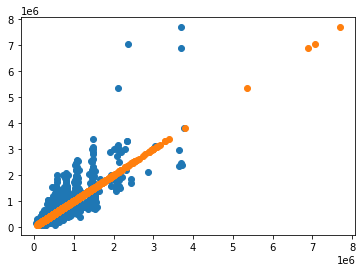

In [549]:
# Examine how well or poorly you are doing with a model
plt.scatter(y_test_pred,y_test)
plt.scatter(y_test,y_test);

This really is a poorly predicted model as shown in the graph above

In [550]:
#See what RFECV tells you to keep and drop
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
selector_RFECV = RFECV(model, step=1, cv=5)
selector_RFECV.fit(X_train, y_train)
selector_RFECV.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [551]:
# Drop what is being shown above, id
X_train3=X_train.drop(columns='id',axis=1)
X_train3
X_test3= X_test.drop(columns='id',axis=1)
X_test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 7189 to 20236
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        5400 non-null   int64  
 1   bathrooms       5400 non-null   float64
 2   sqft_living     5400 non-null   int64  
 3   sqft_lot        5400 non-null   int64  
 4   floors          5400 non-null   float64
 5   waterfront      5400 non-null   int64  
 6   sqft_above      5400 non-null   int64  
 7   sqft_basement   5400 non-null   float64
 8   yr_built        5400 non-null   int64  
 9   yr_renovated    5400 non-null   float64
 10  zipcode         5400 non-null   int64  
 11  lat             5400 non-null   float64
 12  long            5400 non-null   float64
 13  sqft_living15   5400 non-null   int64  
 14  sqft_lot15      5400 non-null   int64  
 15  View_Average    5400 non-null   float64
 16  View_Excellent  5400 non-null   float64
 17  View_Fair       5400 non-null

In [552]:
# Remodel with id dropped
x_cols2=['bedrooms','bathrooms','sqft_lot','floors','waterfront','sqft_basement','yr_built',
         'zipcode','lat','long','sqft_living15','sqft_lot15','View_Average',
           'View_Fair','View_Good','View_None','AvgCond','VeryGoodCond','GoodCond','PoorCond',
           'AvgGrade','GoodGrade','BetterGrade','LowAvgGrade','VeryGoodGrade','ExcellentGrade','FairGrade',
           'LuxaryGrade','LowGrade','MansionGrade','PoorGrade','day_sold','year_sold']
predictors2='+'.join(x_cols2)
formula2= outcome + '~' + predictors2
new_model2 = ols(formula=formula2, data=kc_house_data).fit()
new_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1687.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:00:35   Log-Likelihood:            -2.9385e+05
No. Observations:               21597   AIC:                         5.878e+05
Df Residuals:                   21564   BIC:                         5.880e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.622e+07   5.91e+06     -6.128      0.000   -4.78e+07   -2.46e+07
bedrooms        2107.8124   1778.646      1.185      0.236   -1378.465    5594.090
bathrooms       8.393e+04   3007.253     27.908      0.000     7.8e+04    8.98e+04
sqft_lot           0.2201      0.047      4.708      0.000       0.128       0.312
floors          5.004e+04   3500.094     14.298      0.000    4.32e+04    5.69e+04
waterfront      5.838e+05   1.99e+04     29.320      0.000    5.45e+05    6.23e+05
sqft_basement     65.0514      3.877     16.779      0.000      57.452      72.651
yr_built       -2651.2073     68.175    -38.888      0.000   -2784.836   -2517.579
zipcode         -588.5708     32.395    -18.169      0.000    -652.067    -525.075
lat             5.912e+05   1.05e+04     56.395      0.000    5.71e+05    6.12e+05
long           -1.527e+05   1.28e+04    -11.938      0.000   -1.78e+05   -1.28e+05
sqft_living15     71.8410      3.145     22.846      0.000      65.677      78.005
sqft_lot15        -0.2359      0.072     -3.299      0.001      -0.376      -0.096
View_Average   -1.869e+05   1.49e+04    -12.526      0.000   -2.16e+05   -1.58e+05
View_Fair      -1.346e+05   1.73e+04     -7.757      0.000   -1.69e+05   -1.01e+05
View_Good      -1.235e+05   1.58e+04     -7.799      0.000   -1.55e+05   -9.25e+04
View_None      -2.555e+05   1.39e+04    -18.362      0.000   -2.83e+05   -2.28e+05
AvgCond         1.592e+04   1.53e+04      1.038      0.299   -1.41e+04     4.6e+04
VeryGoodCond    8.112e+04   1.59e+04      5.087      0.000    4.99e+04    1.12e+05
GoodCond        4.284e+04   1.54e+04      2.781      0.005    1.26e+04     7.3e+04
PoorCond       -6.218e+04   3.96e+04     -1.570      0.116    -1.4e+05    1.55e+04
AvgGrade       -3.771e+06   5.37e+05     -7.015      0.000   -4.82e+06   -2.72e+06
GoodGrade      -3.692e+06   5.38e+05     -6.869      0.000   -4.75e+06   -2.64e+06
BetterGrade    -3.528e+06   5.38e+05     -6.562      0.000   -4.58e+06   -2.47e+06
LowAvgGrade    -3.821e+06   5.38e+05     -7.108      0.000   -4.87e+06   -2.77e+06
VeryGoodGrade  -3.324e+06   5.38e+05     -6.182      0.000   -4.38e+06   -2.27e+06
ExcellentGrade -3.022e+06   5.38e+05     -5.619      0.000   -4.08e+06   -1.97e+06
FairGrade      -3.866e+06   5.37e+05     -7.195      0.000   -4.92e+06   -2.81e+06
LuxaryGrade     -2.49e+06   5.38e+05     -4.627      0.000   -3.54e+06   -1.44e+06
LowGrade       -3.869e+06   5.38e+05     -7.191      0.000   -4.92e+06   -2.81e+06
MansionGrade   -1.107e+06    5.4e+05     -2.050      0.040   -2.17e+06   -4.86e+04
PoorGrade       -3.73e+06   5.67e+05     -6.575      0.000   -4.84e+06   -2.62e+06
day_sold        -319.7544    154.908     -2.064      0.039    -623.386     -16.122
year_sold         2.8e+04   2866.678      9.769      0.000    2.24e+04    3.36e+04
============

This is in theory an improvement of our past model as the R squared increased but there are still many problems that stand out and must be addressed

In [553]:
# Test the data again here
y_test_pred2=new_model2.predict(X_test3)
error=y_test_pred-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

57784310307.28622
240383.6731296163


With this changed data we are $240,383.67 off our target... why did this not change, not quite sure

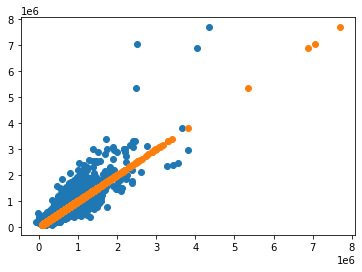

In [554]:
# Examine how well or poorly you are doing
plt.scatter(y_test_pred2,y_test)
plt.scatter(y_test,y_test);

In [555]:
# Examine Jarque-Bera
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test3 = sms.jarque_bera(new_model2.resid)
list(zip(name, test3))

[('Jarque-Bera', 1213083.0607416078),
 ('Prob', 0.0),
 ('Skew', 2.954684600127811),
 ('Kurtosis', 39.2372274508685)]

In [556]:
# Here is an anova table, perhaps a new way of looking at this will help
lm = ols(formula2, kc_house_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq       df            F         PR(>F)
bedrooms        5.417959e+10      1.0     1.404381   2.360045e-01
bathrooms       3.004716e+13      1.0   778.847756  2.095704e-168
sqft_lot        8.550841e+11      1.0    22.164504   2.518138e-06
floors          7.886894e+12      1.0   204.434966   3.657859e-46
waterfront      3.316599e+13      1.0   859.690442  2.446098e-185
sqft_basement   1.086077e+13      1.0   281.520284   8.764223e-63
yr_built        5.834239e+13      1.0  1512.284263  8.741503e-320
zipcode         1.273496e+13      1.0   330.100994   3.215072e-73
lat             1.226980e+14      1.0  3180.436066   0.000000e+00
long            5.498233e+12      1.0   142.518849   9.499016e-33
sqft_living15   2.013572e+13      1.0   521.934858  3.636135e-114
sqft_lot15      4.198711e+11      1.0    10.883414   9.718643e-04
View_Average    6.053073e+12      1.0   156.900774   7.173868e-36
View_Fair       2.321233e+12      1.0    60.168314   9.093415e-15
View_Good 

This reinforces that all of these factors/predictors have an impact on price except potentially bedrooms. This is surprising and we need to look at the assumptions to verify this

In [557]:
# Lets see if price is normally distributed
target = ['price']
kc_cont = kc_house_data[target]

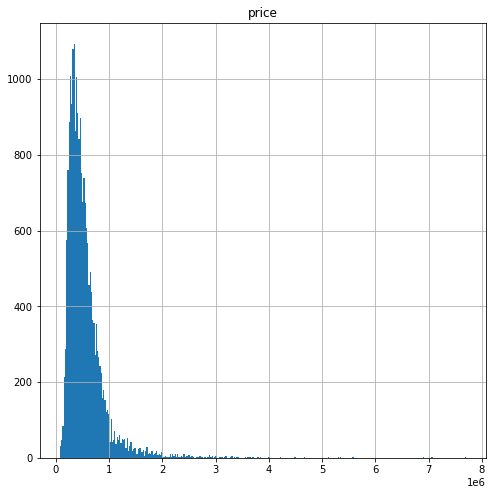

In [558]:
kc_cont.hist(figsize  = [8, 8], bins='auto');

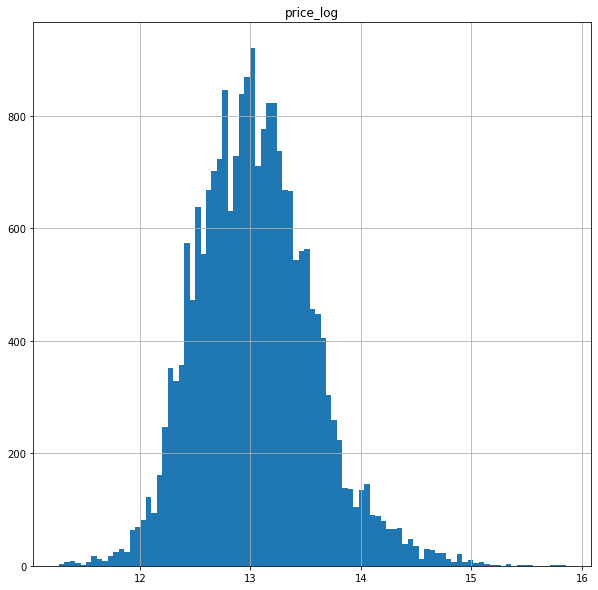

<Figure size 1440x720 with 0 Axes>

In [589]:
log_names = [f'{column}_log' for column in kc_cont.columns]
kc_log = np.log(kc_cont)
kc_log.columns = log_names
kc_log.hist(figsize=(10, 10), bins='auto')
fig = plt.figure(figsize=(20,10))

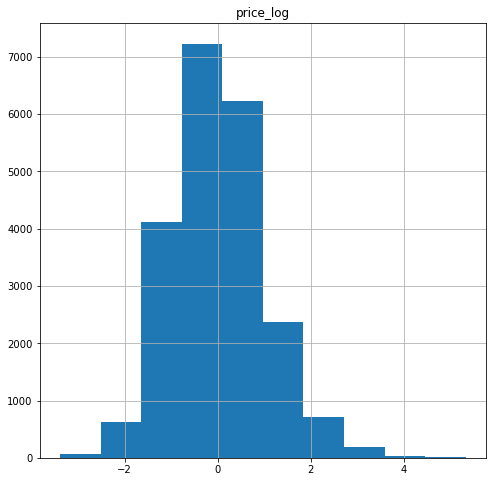

In [590]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = kc_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);


This looks much better, now lets use this on our data

In [561]:
# Normalize price in data
y_train_normalized=normalize(y_train)
y_train_normalized
y_test_normalized=normalize(y_test)
X_test3_normalized=normalize(X_test3)

In [562]:
#check RMSE for this normalized price
y_test_pred3=new_model2.predict(X_test3_normalized)
error=y_test_pred-y_test_normalized
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

378954374785.22614
615592.7020240137


In [563]:
linreg_new = LinearRegression()
linreg_new.fit(X_train3, y_train_normalized)

LinearRegression()

In [564]:
linreg_new.coef_

array([-5.30633307e-02,  1.26754185e-01,  2.73751488e-04,  2.27750179e-07,
        7.50537725e-02,  1.62713232e+00,  7.45691028e-05,  8.70400916e-05,
       -6.11024038e-03,  6.28879698e-05, -1.69796169e-03,  1.70330746e+00,
       -5.73108889e-01,  8.02703965e-05, -8.41972234e-07, -1.32137153e-01,
        2.97225665e-01,  5.09199799e-02,  9.89047980e-02, -3.14913290e-01,
        1.18590385e-02, -3.54143039e-02,  9.29116832e-02, -2.86826931e-01,
        2.17470513e-01, -2.41793256e-02,  6.02549008e-01,  1.83730826e+00,
        4.22426759e+00, -7.59444837e-01, -1.15415554e+00, -1.23128430e+00,
       -1.13182489e+00, -1.02015697e+00, -8.52396532e-01, -4.90682466e-01,
       -1.21880137e-03,  1.69582443e-03,  8.72533028e-02])

In [565]:
linreg_new.intercept_

-148.26555373557474

In [568]:
# Use what they told us
X_train5=X_train.drop(['bedrooms','sqft_lot','floors','waterfront','yr_built',
         'zipcode','lat','long','sqft_living15','sqft_lot15','View_Average',
           'View_Fair','View_Good','View_None','AvgCond','VeryGoodCond','GoodCond','PoorCond',
           'AvgGrade','GoodGrade','BetterGrade','LowAvgGrade','VeryGoodGrade','ExcellentGrade','FairGrade',
           'LuxaryGrade','LowGrade','MansionGrade','PoorGrade','day_sold','year_sold','id','sqft_living',
                      'yr_renovated','View_Excellent','FairCond','month_sold'],axis=1)

In [569]:
X_train5

,bathrooms,sqft_above,sqft_basement
7152,1.75,1100,470.0
8823,2.00,2100,0.0
11039,1.75,1330,0.0
17557,1.00,1780,0.0
16607,2.50,1980,0.0
...,...,...,...
16304,1.75,1840,0.0
79,2.50,3450,0.0
12119,1.50,1090,560.0
14147,2.25,1280,620.0


In [570]:
linreg_newer = LinearRegression()
linreg_newer.fit(X_train5, y_train_normalized)

LinearRegression()

In [571]:
linreg_new.coef_

array([-5.30633307e-02,  1.26754185e-01,  2.73751488e-04,  2.27750179e-07,
        7.50537725e-02,  1.62713232e+00,  7.45691028e-05,  8.70400916e-05,
       -6.11024038e-03,  6.28879698e-05, -1.69796169e-03,  1.70330746e+00,
       -5.73108889e-01,  8.02703965e-05, -8.41972234e-07, -1.32137153e-01,
        2.97225665e-01,  5.09199799e-02,  9.89047980e-02, -3.14913290e-01,
        1.18590385e-02, -3.54143039e-02,  9.29116832e-02, -2.86826931e-01,
        2.17470513e-01, -2.41793256e-02,  6.02549008e-01,  1.83730826e+00,
        4.22426759e+00, -7.59444837e-01, -1.15415554e+00, -1.23128430e+00,
       -1.13182489e+00, -1.02015697e+00, -8.52396532e-01, -4.90682466e-01,
       -1.21880137e-03,  1.69582443e-03,  8.72533028e-02])

In [ ]:
# Model based on what they told us to use 
x_cols3=['bathrooms','sqft_basement','sqft_above']
predictors3='+'.join(x_cols3)
formula3= outcome + '~' + predictors3
new_model3 = ols(formula=formula3, data=kc_house_data).fit()
new_model3.summary()

Using the three predictors the stepwise suggested we get a poor model and once again need to try and find another path

In [573]:
#Try to use log on predictors
kc_house_data['sqft_lot'] = kc_house_data['sqft_lot'].apply(lambda x: np.log(x))

In [583]:
kc_house_data['price']=kc_house_data['price'].apply(lambda x: np.log(x))
predictors4=kc_house_data['sqft_lot']

In [585]:
#Model sqft_lot to price
formula4= 'price ~ sqft_lot'
new_model4 = ols(formula=formula4, data=kc_house_data).fit()
new_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     392.6
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.33e-86
Time:                        16:12:39   Log-Likelihood:                 59421.
No. Observations:               21597   AIC:                        -1.188e+05
Df Residuals:                   21595   BIC:                        -1.188e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9222      0.001    875.888      0.000       0.920       0.924
sqft_lot       0.0023      0.000     19.814      0.000       0.002       0.003
==============================================================================
Omnibus:                      176.136   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.140
Skew:                           0.163   Prob(JB):                     1.05e-45
Kurtosis:                       3.353   Cond. No.                         91.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is another poor model, R squared of .018

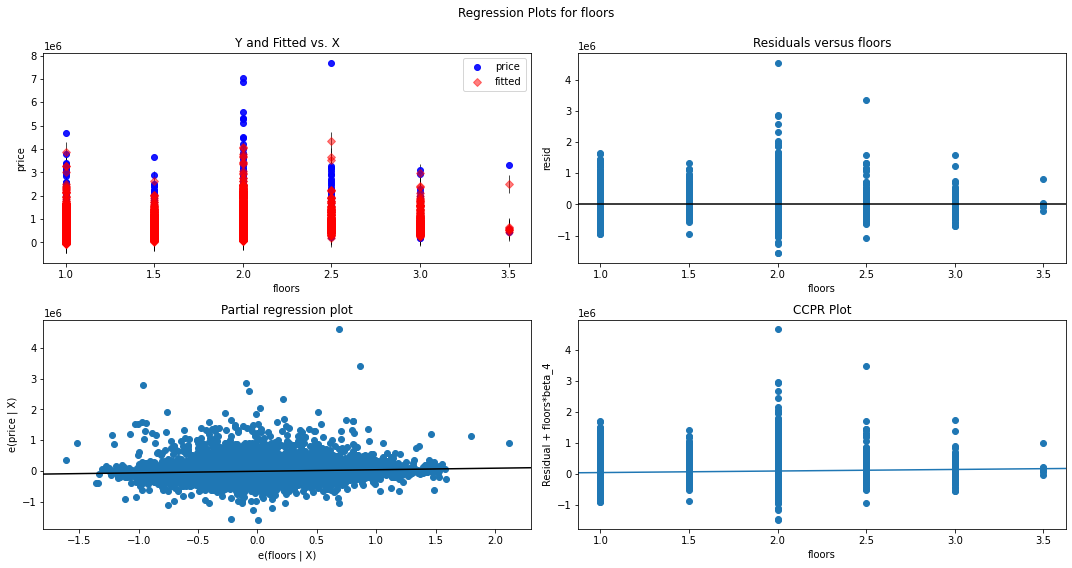

In [592]:
#Try and visualize errors of best model
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(new_model2, "floors", fig=fig)
plt.show()

You can only do this to one predictor at a time, this won't really help